In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector
from scipy import fftpack
from tabulate import tabulate
%matplotlib inline
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)
plt.rcParams.update({'font.size': 7})
font_size = 7

### Import data
copy the data file from postProcessing/forces/0/coefficient.data to ./data folder

In [2]:
f_name = "/postProcessing/forces/0/coefficient.dat"
fo_name = "plot_data/cases/"
cases = ['case_100','case_200','case_400']
mesh_size = np.array([100, 200, 400])
data = {}
for case in cases:
    data[case] = np.loadtxt(fo_name+case+f_name, unpack=True, usecols=[0, 1, 3])

#### Ploting values of Cd and Cl after 3s 
File will be saved in /plots dir

Frequency peak at f=2.25
Frequency peak at f=2.25
Frequency peak at f=2.25
Amplitude=-0.8879264531348731, Angular freq.=18.863414817225006, ordinary freq.=3.0022057117542613, phase=-1.1507884361939373, offset=-0.013201619965346984, Max. Cov.=1.202798084517341e-07
Amplitude=-0.9323237358174408, Angular freq.=18.89667378324475, ordinary freq.=3.0074990405984288, phase=-1.1221361529938882, offset=-0.01803174489503734, Max. Cov.=1.5330697467050736e-07


Text(8.1, 0, '$N_x =400$')

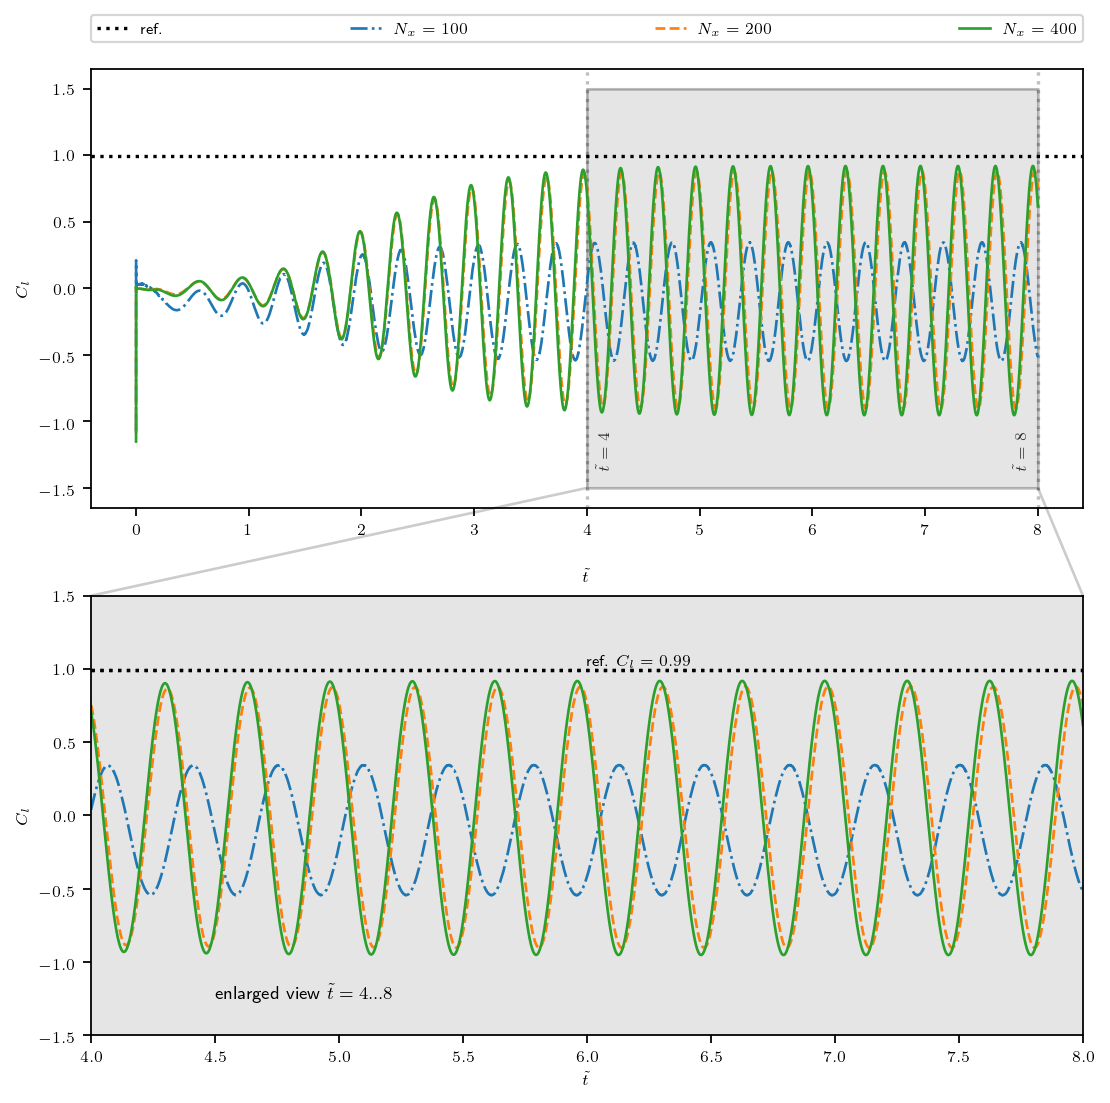

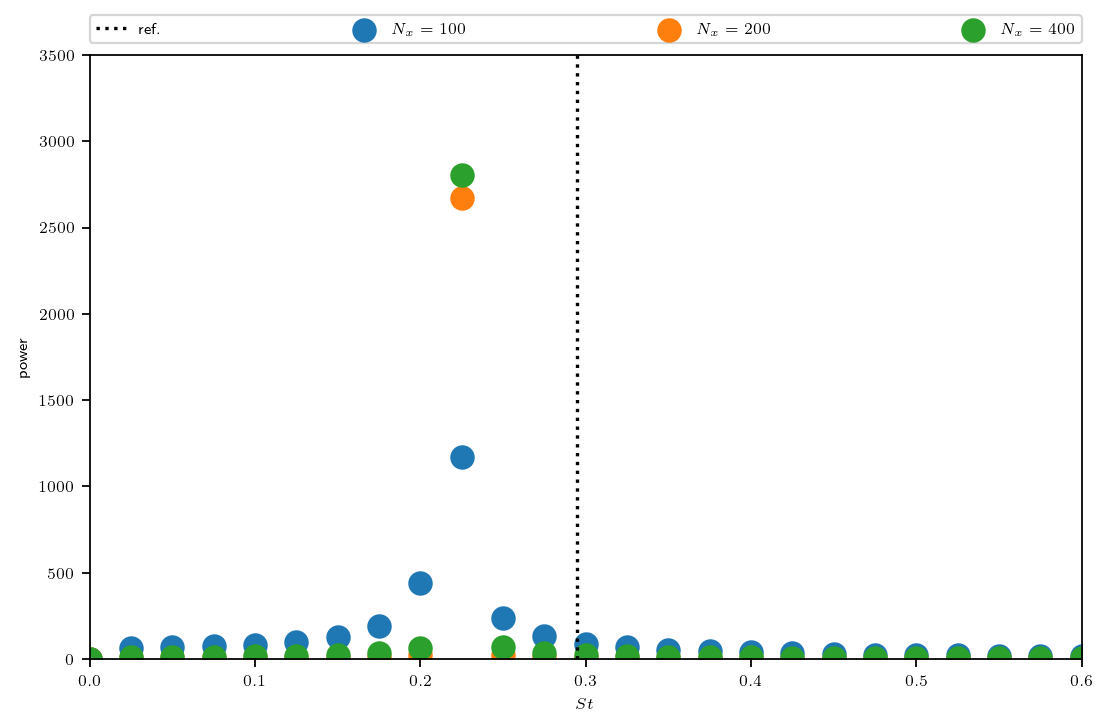

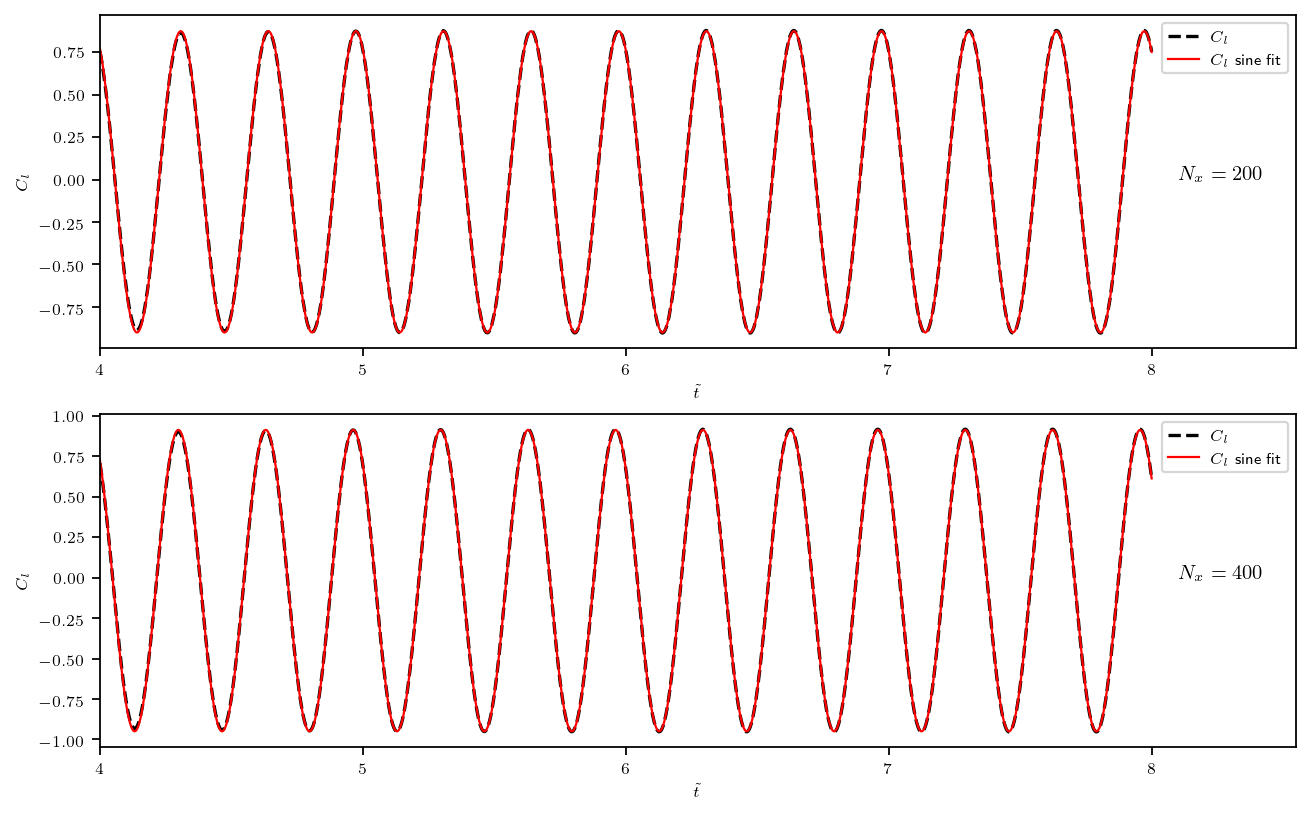

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(8,8))

#ax1 = plt.axes(upper_plot_bounds, xticks=[], xlim=[t_min, t_max], ylim=[0, 10])
ax1.fill_between([4, 8], [-1.5, -1.5], [1.5, 1.5], color='k', alpha=0.1) #[-1, 120]
ax1.tick_params(labelsize=font_size)
ax1.set_ylabel(r"$C_l$")
ax1.set_xlabel(r"$\tilde{t}$", labelpad=15)
ax1.axvline(4, ls=":", color="k", alpha=0.25)
ax1.axvline(8, ls=":", color="k", alpha=0.25)

#ax2 = plt.axes(lower_plot_bounds, yticks=[7.0, 7.5, 8.0, 8.5], xlim=[t_min, t_max], ylim=[re_zoom_min, re_zoom_max])
ax2.patch.set_facecolor('k')
ax2.patch.set_alpha(0.1)
ax2.set_ylabel(r"$C_l$")
ax2.set_xlabel(r"$\tilde{t}$", fontsize=font_size)
ax2.tick_params(labelsize=font_size)
ax2.set_xlim((4,8))
ax2.set_ylim((-1.5,1.5))
ax1.axhline(0.99, ls=":", color="k", label="ref.")
ax2.axhline(0.99, ls=":", color="k", label="ref.")

# plotting
for i, case in enumerate(cases):
    ax1.plot(data[case][0],data[case][2], ls=lines[i], linewidth=1.2, markevery=70, label=labels[i])
    ax2.plot(data[case][0],data[case][2], ls=lines[i], linewidth=1.2, markevery=70, label=labels[i])
ax2.axhline(0.99, ls=":", color="k", label="ref.")

#for box and lines
mark_inset(ax1, ax2, loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="k", alpha=0.2) 

# for legend
ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=1, ncol=4, mode="expand", borderaxespad=0., fontsize=font_size)

# text in plot
ax2.text(4.5, -1.25, r"enlarged view $ \tilde t ={:.0f}...{:.0f}$".format(4, 8), fontsize=font_size+1, color='k')
ax1.text(4.1, -1.35, r"$ \tilde t =4$", rotation=90, fontsize=font_size, color='k', alpha=0.8)
ax1.text(7.8, -1.35, r"$ \tilde t =8$", rotation=90, fontsize=font_size, color='k', alpha=0.8)
ax2.text(6, 1.03, r"ref. $ C_l =0.99$", fontsize=font_size, color='k')

#spectrum analysis
fig, ax = plt.subplots(1, 1, figsize=(8,5))
for i, case in enumerate(cases):
    freq, power = fft_cl[case]
    ax.scatter(freq[:100] * diameter, power[:100], s=100, label=labels[i])
    print("Frequency peak at f={:2.2f}".format(freq[np.argmax(power)]))
ax.axvline(0.295, ls=":", color="k", label="ref.")

ax.set_xlabel("$St$", fontsize=font_size)
ax.set_ylabel("power", fontsize=font_size)
ax.set_xlim(0, 0.6)
ax.set_ylim(0, 3500)
ax.tick_params(labelsize=font_size)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=font_size)

# sine curve fitting 
fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(8,5))
fig.tight_layout(h_pad=2)

ttt = data['case_200'][0][8000:]
yyy = data['case_200'][2][8000:]
res = fit_sin(ttt, yyy)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, ordinary freq.=%(freq)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res )

ax1.plot(data['case_200'][0][8000:], data['case_200'][2][8000:], "--k", label="$C_l $", linewidth=1.5)
ax1.plot(data['case_200'][0][8000:], res["fitfunc"](data['case_200'][0][8000:]), "r-", label="$C_l$ sine fit", linewidth=1)
ax1.legend(loc="best")
ax1.set_xlim(4, 8.55)
ax1.set_ylabel(r"$C_l$", fontsize=font_size)
ax1.set_xlabel(r"$\tilde{t}$", fontsize=font_size)

ttt = data['case_400'][0][8000:]
yyy = data['case_400'][2][8000:]
res = fit_sin(ttt, yyy)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, ordinary freq.=%(freq)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res )

ax2.plot(data['case_400'][0][8000:], data['case_400'][2][8000:], "--k", label="$C_l $", linewidth=1.5)
ax2.plot(data['case_400'][0][8000:], res["fitfunc"](data['case_400'][0][8000:]), "r-", label="$C_l$ sine fit", linewidth=1)
ax2.legend(loc="best")
ax2.set_xlim(4, 8.55)
ax2.set_ylabel(r"$C_l$", fontsize=font_size)
ax2.set_xlabel(r"$\tilde{t}$", fontsize=font_size)

# text in plot
ax1.text(8.1, 0, r"$N_x =200$", fontsize=font_size+2, color='k')
ax2.text(8.1, 0, r"$N_x =400$", fontsize=font_size+2, color='k')

  Case no.  Case        Cell size(x)    min value after 5s(Cd)    mean value after 5s(Cd)    max value after 5s(Cd)
----------  --------  --------------  ------------------------  -------------------------  ------------------------
         1  case_100             100                   3.05413                    3.06098                   3.06604
         2  case_200             200                   3.14741                    3.17212                   3.19653
         3  case_400             400                   3.14756                    3.17533                   3.20258


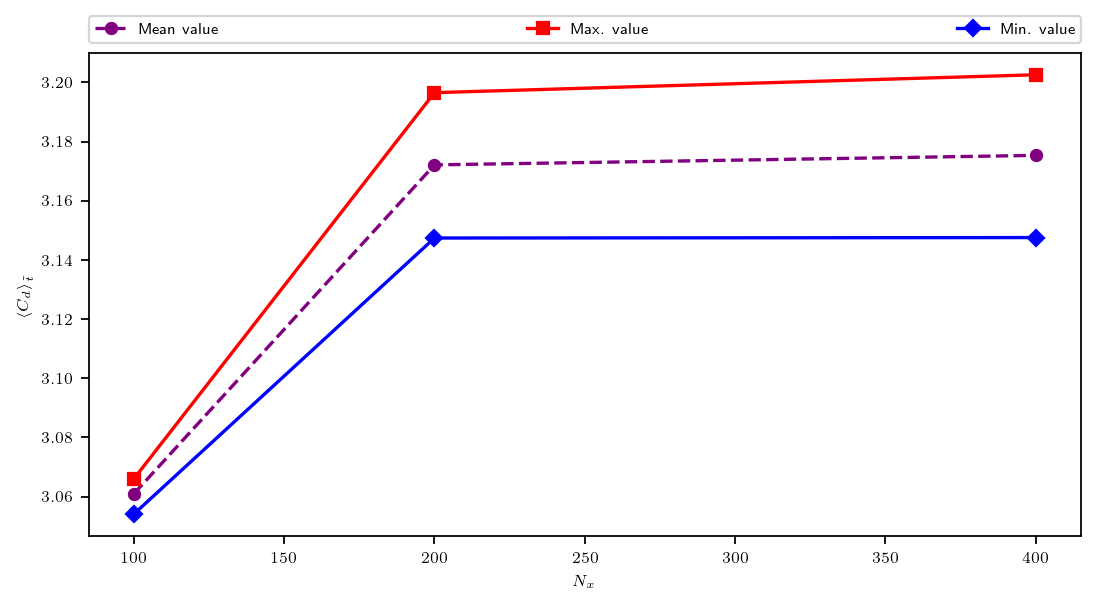

In [5]:
colors = ["red","blue","green"]
mean_cd = np.zeros(mesh_size.shape)
max_cd = np.zeros(mesh_size.shape)
min_cd = np.zeros(mesh_size.shape)
fig, ax = plt.subplots(1,1,figsize=(8,4))

for i, case in enumerate(cases):
    mean_cd[i] = data[case][1][tml:].mean()
    max_cd[i]  = data[case][1][tml:].max()
    min_cd[i]  = data[case][1][tml:].min()
ax.plot(mesh_size, mean_cd, '--o', markersize=5, color='Purple', label="Mean value")
ax.plot(mesh_size, max_cd, '-s', markersize=5, color='r', label="Max. value")
ax.plot(mesh_size, min_cd, '-D', markersize=5, color='b', label="Min. value")
ax.set_xlabel(r"$N_x$", fontsize=font_size)
ax.set_ylabel(r"${\langle C_d \rangle}_{\tilde{t}}$", fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=font_size)

#print mean values
p_data = [[0]*6]*len(mesh_size)
for i, case in enumerate(cases):
    p_data[i] = [i+1, case, mesh_size[i], min_cd[i], mean_cd[i], max_cd[i]]
print (tabulate(p_data, headers=["Case no.", "Case", "Cell size(x)", "min value after 5s(Cd)", "mean value after 5s(Cd)" , "max value after 5s(Cd)"]))

  Case no.  Case        Cell size(x)    min value after 5s(Cl)    mean value after 5s(Cl)    max value after 5s(Cl)
----------  --------  --------------  ------------------------  -------------------------  ------------------------
         1  case_100             100                 -0.546845                 -0.0906619                  0.343828
         2  case_200             200                 -0.904919                 -0.0126599                  0.878955
         3  case_400             400                 -0.953915                 -0.0164522                  0.918634


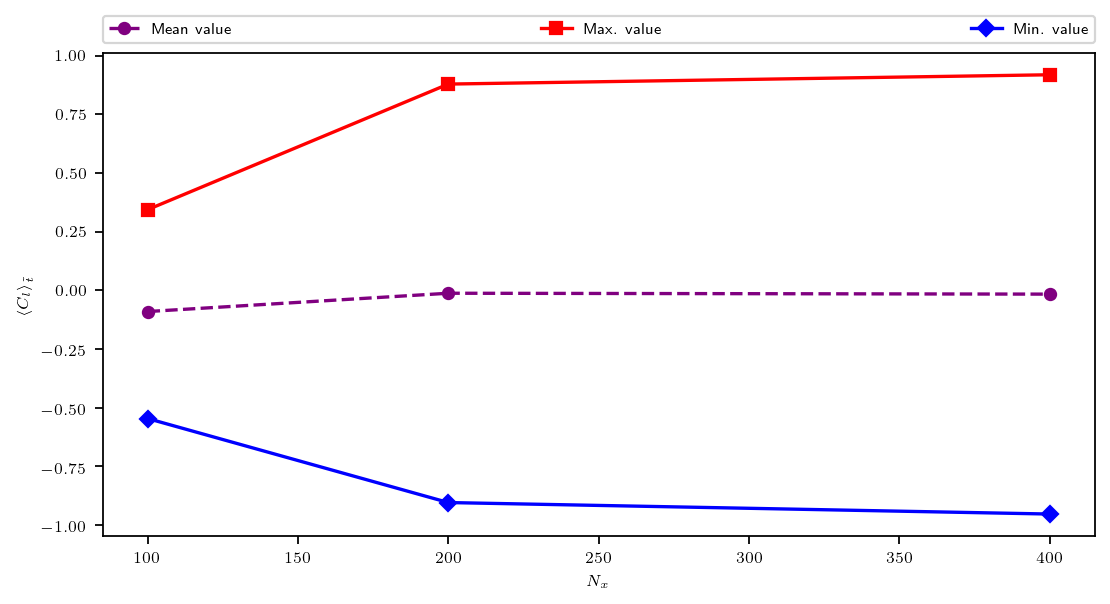

In [6]:
mean_cl = np.zeros(mesh_size.shape)
max_cl = np.zeros(mesh_size.shape)
min_cl = np.zeros(mesh_size.shape)
plot, ax = plt.subplots(1,1,figsize=(8,4))

for i, case in enumerate(cases):
    mean_cl[i] = data[case][2][tml:].mean()
    max_cl[i]  = data[case][2][tml:].max()
    min_cl[i]  = data[case][2][tml:].min()
ax.plot(mesh_size, mean_cl, '--o', color='purple', markersize=5, label="Mean value")
ax.plot(mesh_size, max_cl, '-s', color='r', markersize=5, label="Max. value")
ax.plot(mesh_size, min_cl, '-D', color='b', markersize=5, label="Min. value")
ax.set_xlabel(r"$N_x$", fontsize=font_size)
ax.set_ylabel(r"${\langle C_l \rangle}_{\tilde{t}}$", fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=font_size)

#print mean/min/max values
header = ["Case no.", "Case", "Cell size(x)", "min value after 5s(Cl)", "mean value after 5s(Cl)", "max value after 5s(Cl)"]
p_data = [[0]*len(header)]*len(mesh_size)

for i, case in enumerate(cases):
    p_data[i] = [i+1, case, mesh_size[i], min_cl[i], mean_cl[i], max_cl[i]]
print (tabulate(p_data, headers=header))